# SP via class imbalance

Example [test scores](https://www.brookings.edu/blog/social-mobility-memos/2015/07/29/when-average-isnt-good-enough-simpsons-paradox-in-education-and-earnings/)

SImpson's paradox can also occur due to a class imbalance, where for example, over time the value of several differnt subgroups all increase, but the totla average decreases over tme.   This is also am mportant tpe to catch because this can inicate a large class disparity beased on the subgrouping variable.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sp_data_util import sp_plot

In [3]:
t = np.linspace(0,50,11)
count_rate = np.asarray([1,1.5,1.4])
count_pow = np.asarray([1,1.4, 1.3])
count_0 = np.asarray([100,60,40])
count = np.asarray([count_0 + count_rate*(t_i**count_pow) for t_i in t])
share = count/np.asarray([np.sum(count, axis=1)]*3).T
score_rate = np.asarray([.1, .112, .15])
score_0 = [310,290,280]
scores_group = np.asarray([score_0 + score_rate*t_i for t_i in t])
total_score = np.sum(scores_group*share,axis=1)


In [4]:
total_score

array([298.        , 297.45443985, 296.68317666, 296.10797527,
       295.75884352, 295.60140953, 295.59491821, 295.70503918,
       295.90526496, 296.17565064, 296.50124668])

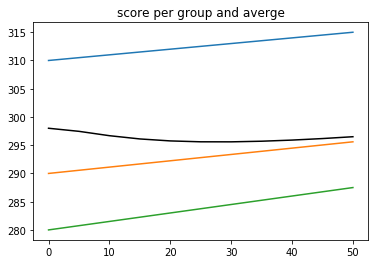

In [7]:
plt.plot(t,scores_group)
plt.plot(t,total_score,'k', label ='average')
plt.title('score per group and averge');

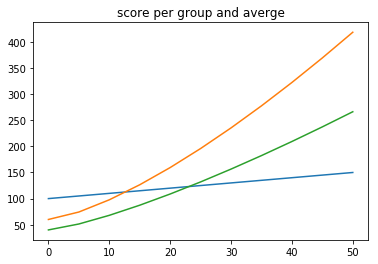

In [8]:
plt.plot(t,count)
plt.title('score per group and averge');

We can change the numbers a bit to see tht it still works. 

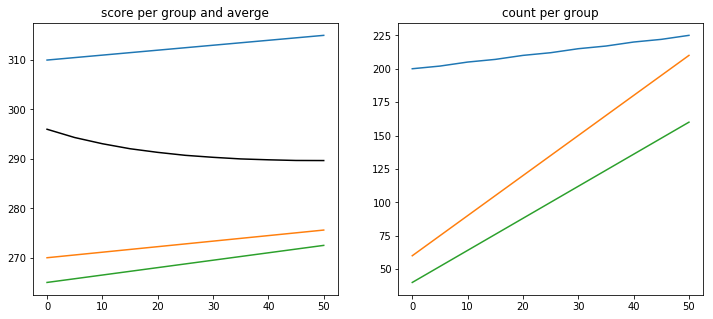

In [40]:
t = np.linspace(0,50,11)
count_rate = np.asarray([.5,3,2.4])
count_pow = np.asarray([1,1,1]) #1.24, 1.13])
group_names = ['W','B','H']
count_0 = np.asarray([200,60,40])
count = np.asarray([np.floor(count_0 + count_rate*(t_i**count_pow)) for t_i in t])
share = count/np.asarray([np.sum(count, axis=1)]*3).T
score_rate = np.asarray([.1, .112, .15])
score_0 = [310,270,265]
scores_group = np.asarray([score_0 + score_rate*t_i for t_i in t])
total_score = np.sum(scores_group*share,axis=1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(t,scores_group)
plt.plot(t,total_score,'k', label ='average')
plt.title('score per group and averge');

plt.subplot(1,2,2)
plt.plot(t,count)
plt.title('count per group');

In [31]:
count

array([[201., 110.,  41.],
       [201., 110.,  41.],
       [201., 110.,  41.],
       [201., 110.,  41.],
       [201., 110.,  41.],
       [201., 110.,  41.],
       [201., 110.,  41.],
       [201., 110.,  41.],
       [201., 110.,  41.],
       [201., 110.,  41.],
       [201., 110.,  41.]])

The above is occuring in aggregate data, we should generate and aim to detect from the individual measurements. So we can expand the above generator.  We'll use the group score and counts to draw the indivdual rows of our table. 

In [11]:
dat = [[t_t,np.random.normal(loc=sg,scale=10),g ]
            for sg_t, c_t,t_t in zip(scores_group,count,t) 
           for sg,c,g in zip(sg_t,c_t,group_names) 
           for i in range(int(c))]

In [12]:
len(dat)

5056

In [13]:
df = pd.DataFrame(data=dat,columns = ['year','score','race'])

In [14]:
df.head()

,year,score,race
0,0.0,317.406032,W
1,0.0,322.930140,W
2,0.0,322.785278,W
3,0.0,324.300812,W
4,0.0,314.447719,W


In [15]:
df.groupby(['race','year']).mean().unstack()

score                                                              \
year        0.0         5.0         10.0        15.0        20.0        25.0   
race                                                                           
B     270.336025  271.768288  270.284064  272.126273  271.081739  272.043774   
H     278.739583  280.154074  280.306798  283.449269  282.726368  284.244439   
W     310.514943  310.218780  311.650645  312.243587  313.237945  313.304649   

                                                                  
year        30.0        35.0        40.0        45.0        50.0  
race                                                              
B     275.050681  273.720725  274.548243  274.464749  275.244692  
H     285.260931  284.467773  285.756068  286.795326  286.188828  
W     312.103214  314.073049  314.671514  314.392244  313.950122

In [16]:
df.groupby(['year']).mean().T

year,0.0,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0
score,298.242445,297.392074,296.557516,296.53393,295.444705,294.88076,294.543461,293.955473,293.972179,293.334851,292.700234


The overall goes down while each of the groupwise means goes up, as expected.  

In [17]:
df.groupby('race').corr()

score      year
race                          
B    score  1.000000  0.145550
     year   0.145550  1.000000
H    score  1.000000  0.205097
     year   0.205097  1.000000
W    score  1.000000  0.125949
     year   0.125949  1.000000

In [18]:
df.corr()

,year,score
year,1.000000,-0.076652
score,-0.076652,1.000000


We can see this in the correlation matrices as well, so our existing detector will work, but it has an intuitively different generating mechanism.

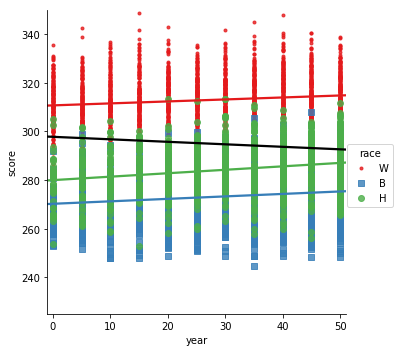

In [20]:
sp_plot(df,'year','score','race',domain_range=[-1, 51, 225, 350])

Vizually, the scatter plots for this are also somewhat different, the groups are not as separable as they were in the regression-based examples we worked with initially.  